In [1]:
library(ggplot2)
library(dplyr)
library(tidyr)
library(RColorBrewer)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



# Womans First Guatemala Methylation QC Report
### Ian Arriaga MacKenzie

Path To All Files:\
/nfs/storage/math/gross-s2/projects/guatemala/MEGA_backbone_Full_Project_08012018_Deliverable/Genetics

Based on Wheeler GWAS QC Pipeline:\
https://hwheeler01.github.io/CompBio/GWAS_QC.html

### Cleaning heterozygous haploid errors

*Command:*\
plink1.9 --bfile /nfs/storage/math/gross-s2/projects/guatemala/MEGA_backbone_Full_Project_08012018_Deliverable/Genetics/cleaned_files/Borengasser_MEGA_07242018_noFail_SNPs_passing_QC --set-hh-missing --make-bed --out /nfs/storage/math/gross-s2/projects/guatemala/MEGA_backbone_Full_Project_08012018_Deliverable/Genetics/Ian_QC/QC1/QC_setHHmissing

1612522 variants\
132 people (77 males, 55 females)\
17346 het. haploid genotypes present

### Sex Check

*Command:*\
plink1.9 --bfile /nfs/storage/math/gross-s2/projects/guatemala/MEGA_backbone_Full_Project_08012018_Deliverable/Genetics/Ian_QC/QC1/QC_setHHmissing --check-sex --out /nfs/storage/math/gross-s2/projects/guatemala/MEGA_backbone_Full_Project_08012018_Deliverable/Genetics/Ian_QC/QC2/QC_sexcheck

1612522 variants\
132 people (77 males, 55 females)\
19759 Xchr and 0 Ychr variant(s) scanned, 7 problems detected.\

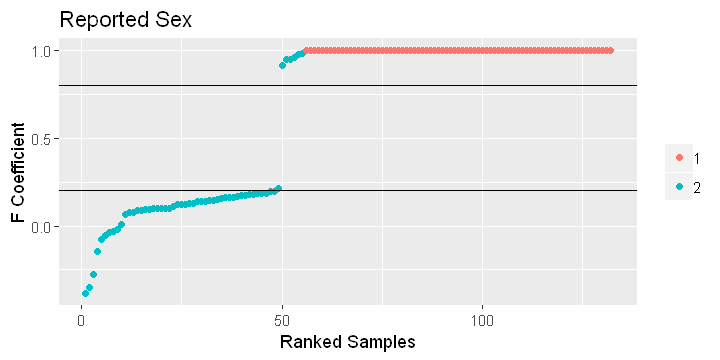

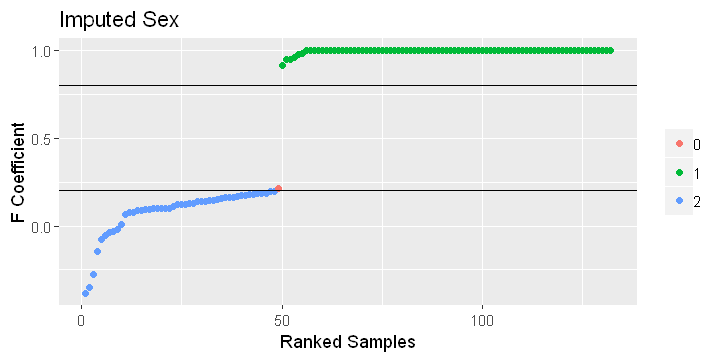

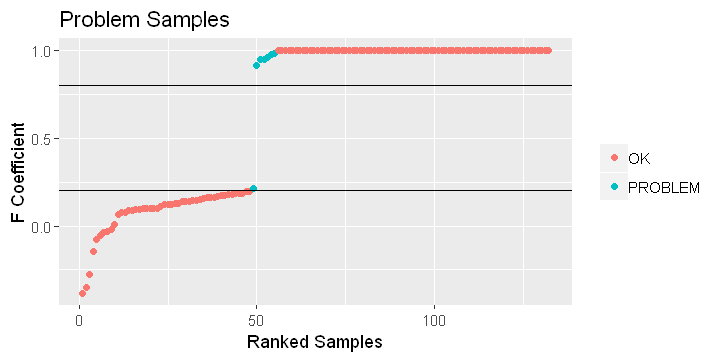

In [3]:
options(repr.plot.width=6, repr.plot.height=3)

QCsexcheckA = read.csv("QC_sexcheck.sexcheck", sep="")
QCsexcheckB = QCsexcheckA[order(QCsexcheckA$F),]
QCsexcheckB$rank = seq(1, 132, by = 1)
ggplot(QCsexcheckB, aes(rank, F)) +
  geom_point(aes(color = factor(PEDSEX))) +
  labs(title = 'Reported Sex', x = 'Ranked Samples', y = 'F Coefficient') +
  theme(legend.title = element_blank()) +
  geom_hline(yintercept = 0.2) +
  geom_hline(yintercept = 0.8)
ggplot(QCsexcheckB, aes(rank, F)) +
  geom_point(aes(color = factor(SNPSEX))) +
  labs(title = 'Imputed Sex', x = 'Ranked Samples', y = 'F Coefficient') +
  theme(legend.title = element_blank()) +
  geom_hline(yintercept = 0.2) +
  geom_hline(yintercept = 0.8)
ggplot(QCsexcheckB, aes(rank, F)) +
  geom_point(aes(color = factor(STATUS))) +
  labs(title = 'Problem Samples', x = 'Ranked Samples', y = 'F Coefficient') +
  theme(legend.title = element_blank()) +
  geom_hline(yintercept = 0.2) +
  geom_hline(yintercept = 0.8)

![image](..\WF_QC_jupyter\images\problemsamplesframe.png)